# Lab-5 Solution

Answer questions in the designated cells

## Preparation

Use dataset that is provided in the eLearning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Load data

In [2]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('./data/SBA_loans_train.csv')
X_test  = pd.read_csv('./data/SBA_loans_test.csv')
orig_columns = list(X_train.columns)

In [3]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [4]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


## Preparation

This is the same dataset as in the Lab-3. Repeat the steps from Lab-3 to replace Na's with zero for numerical variables and with "Missing" for categorical. 

In [5]:
values_to_fill = {}
for col in X_train.drop(columns=['Defaulted']).columns:
    if X_train[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)

# Question 1 - point

Consider following variables to be Categorical:
- "City" has 22070 values
- "State" has 52 values
- "Bank" has 4834 values
- "BankState" has 56 values
- "RevLineCr" has 14 values
- "LowDoc" has 8 values

Use Target and WOE encoder from the `category_encoders` library to encode categorical variables.  
Fit encoders using Training dataset only.  
For each encoder, give new columns names "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

### Solution

In [6]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy


label_col = 'Defaulted'
orig_categorical_columns = ["City", "State", "Bank", "BankState", "RevLineCr", "LowDoc"]
cat_encoders = {}


# Target encoding
target_encoder = ce.TargetEncoder(cols=orig_categorical_columns, min_samples_leaf=20, smoothing=10)
target_encoder.fit(X_train[orig_categorical_columns],X_train[label_col])
X_train_target_enc = target_encoder.transform(X_train[orig_categorical_columns])
X_test_target_enc = target_encoder.transform(X_test[orig_categorical_columns])

# WOE encoding
woe_encoder = ce.WOEEncoder(cols=orig_categorical_columns)
woe_encoder.fit(X_train[orig_categorical_columns],X_train[label_col])
X_train_woe_enc = woe_encoder.transform(X_train[orig_categorical_columns])
X_test_woe_enc = woe_encoder.transform(X_test[orig_categorical_columns])


te_columns = []
woe_columns = []
for col in orig_categorical_columns:
    X_train[col+"_te"] = X_train_target_enc[col]
    X_test[col+"_te"] = X_test_target_enc[col]
    te_columns.append(col+"_te")
    
    X_train[col+"_woe"] = X_train_woe_enc[col]
    X_test[col+"_woe"] = X_test_woe_enc[col]
    woe_columns.append(col+"_woe")

cat_encoders[("orig_categorical_columns","te")] = [deepcopy(target_encoder),"te"]
cat_encoders[("orig_categorical_columns","woe")] = [deepcopy(woe_encoder),"woe"]

In [7]:
cat_encoders

{('orig_categorical_columns',
  'te'): [TargetEncoder(cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr',
                      'LowDoc']), 'te'],
 ('orig_categorical_columns',
  'woe'): [WOEEncoder(cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']), 'woe']}

In [8]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_te,City_woe,State_te,State_woe,Bank_te,Bank_woe,BankState_te,BankState_woe,RevLineCr_te,RevLineCr_woe,LowDoc_te,LowDoc_woe
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,0.283212,1.107415,0.167744,-0.050917,0.308181,0.741374,0.158105,-0.122172,0.146342,-0.214300,0.186457,0.076065
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,0.191919,0.118312,0.200634,0.167471,0.138341,-0.279641,0.221678,0.293405,0.146342,-0.214300,0.186457,0.076065
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,0.125985,-0.336038,0.096586,-0.682359,0.062502,-1.049319,0.076696,-0.930088,0.149252,-0.191171,0.090740,-0.755151
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,0.351182,1.063740,0.200634,0.167471,0.059406,-1.162305,0.068197,-1.056343,0.253136,0.467327,0.186457,0.076065
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,0.275805,0.622485,0.179574,0.031247,0.362410,1.072323,0.101741,-0.624053,0.149252,-0.191171,0.090740,-0.755151


## Question 2 - 5 points

Review sklearn documentation on the RandomForest optimal hyper-parameters choice and methods for tuning: https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters

Train RandomForest models with the following parameters:

```
n_estimators = [50, 100, 200]
max_depth = [5,7,10]
max_features = ["sqrt", "log2", 5]
random_state = 0
max_samples = [0.2, 0.4, 0.6]
bootstrap = True
```
Don't use original categorical variables, only encoded via Target and WOE encoder.

Use F1 to find best performing model on the Test dataset.

Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

Report best model (as measured by F1) hyper-parameters.
Report best model F1 and confusion matrix.

**Note**: depending on your PC resources you can inscrease speed of model training by specifying `n_jobs` parameter.

### Solution

In [9]:
from sklearn.ensemble import RandomForestClassifier
best_f1 = 0
best_params = {}
best_model = None
label_col = 'Defaulted'

X_tr = X_train.drop(columns=orig_categorical_columns).drop(columns=label_col)
Y_tr = X_train[label_col]
X_tst = X_test.drop(columns=orig_categorical_columns).drop(columns=label_col)
Y_tst = X_test[label_col]

In [10]:
# Solution 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

best_f1 = 0
best_params = {}
best_model = None
label_col = 'Defaulted'

X_tr = X_train.drop(columns=orig_categorical_columns).drop(columns=label_col)
Y_tr = X_train[label_col]
X_tst = X_test.drop(columns=orig_categorical_columns).drop(columns=label_col)
Y_tst = X_test[label_col]
for n_estimators in [50, 100, 200]:
    for max_depth in [5,7,10]:
        for max_features in ["sqrt", "log2", 5]:
            for max_samples in [0.2, 0.4, 0.6]:
                rfc = RandomForestClassifier(n_jobs=4,
                                             random_state=0, 
                                             bootstrap=True,
                                             n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             max_features=max_features,
                                             max_samples=max_samples)

                rfc.fit(X_tr, Y_tr)
                y_tst_pred = rfc.predict(X_tst)
                y_tr_pred = rfc.predict(X_tr)
                print("Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):(", \
                                    n_estimators, max_depth,max_features,max_samples,")")
                #print("F1 for Train:", f1_score(Y_tr, y_tr_pred, average='weighted'))
                f1 = f1_score(Y_tst, y_tst_pred, average='weighted')
                if f1>best_f1:
                    best_f1 = f1
                    best_params["n_estimators"] = n_estimators
                    best_params["max_depth"] = max_depth
                    best_params["max_features"] = max_features
                    best_params["max_samples"] = max_samples
                print("F1 for Test:", f1)
                #print("Test set confusion matrix:")
                #print(confusion_matrix(y_true, y_pred))

Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 sqrt 0.2 )
F1 for Test: 0.8751412421289169
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 sqrt 0.4 )
F1 for Test: 0.8718995634648579
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 sqrt 0.6 )
F1 for Test: 0.8691013271230842
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 log2 0.2 )
F1 for Test: 0.8621578929046592
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 log2 0.4 )
F1 for Test: 0.8660373507517962
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 log2 0.6 )
F1 for Test: 0.8600077591721558
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 5 0.2 )
F1 for Test: 0.8751412421289169
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 50 5 5 0.4 )
F1 for

Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 sqrt 0.4 )
F1 for Test: 0.8972615295298552
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 sqrt 0.6 )
F1 for Test: 0.8983055814917007
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 log2 0.2 )
F1 for Test: 0.8898591477364785
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 log2 0.4 )
F1 for Test: 0.8898347594685282
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 log2 0.6 )
F1 for Test: 0.8902108513866124
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 5 0.2 )
F1 for Test: 0.8977672003626873
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 5 0.4 )
F1 for Test: 0.8972615295298552
Trained Decision Tree with (n_estimators, max_depth, max_features,max_samples):( 200 7 5 0.6 )
F

In [14]:
'''Re-train model with best params'''
from sklearn.metrics import confusion_matrix
print("Best params:", best_params)
best_model = RandomForestClassifier(n_jobs=4,
                                    random_state=0,
                                    bootstrap=True,
                                    n_estimators=best_params["n_estimators"],
                                    max_depth=best_params["max_depth"],
                                    max_features=best_params["max_features"],
                                    max_samples=best_params["max_samples"])

best_model.fit(X_tr, Y_tr)
y_tst_pred = best_model.predict(X_tst)
y_tr_pred = best_model.predict(X_tr)
print("Trained Decision Tree with parameters:")
print(best_params)
print("F1 for Train:", f1_score(Y_tr, y_tr_pred, average='weighted'))
f1 = f1_score(Y_tst, y_tst_pred, average='weighted')
print("F1 for Test:", f1)
print("Test set confusion matrix:")
print(confusion_matrix(Y_tst, y_tst_pred))

Best params: {'n_estimators': 200, 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.4}
Trained Decision Tree with parameters:
{'n_estimators': 200, 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.4}
F1 for Train: 0.9259196392994788
F1 for Test: 0.9144585358552999
Test set confusion matrix:
[[90811  1878]
 [ 7162 12545]]


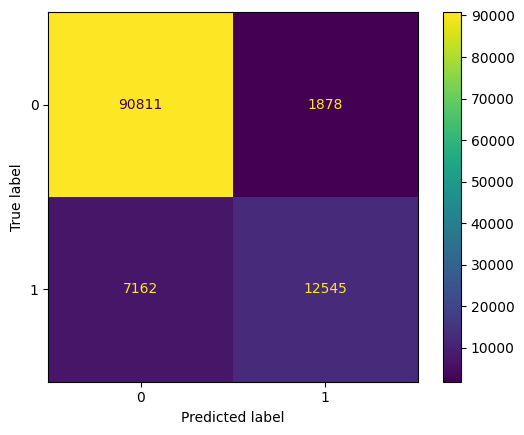

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_tst, y_tst_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
plt.show()

## Question 3 - 1 Point

Calculate best model feature importances using permutation method.
Produce visualization of the best model feature importances.

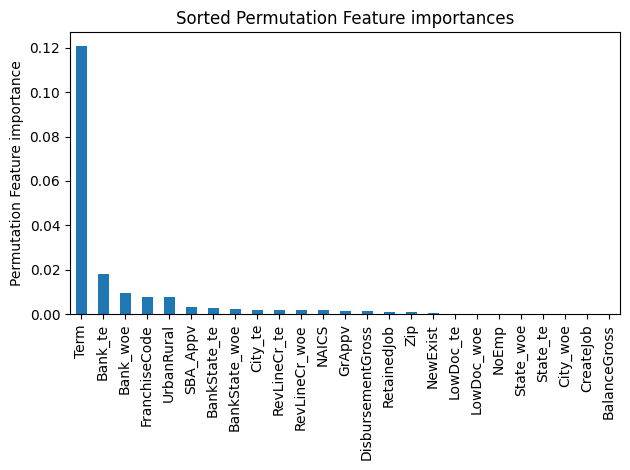

In [24]:
from sklearn.inspection import permutation_importance
import pandas as pd
result = permutation_importance(
    best_model, X_tst, Y_tst, n_repeats=10, random_state=42, n_jobs=8
)

tree_importances = pd.Series(result.importances_mean, index=X_tst.columns)

feature_names = X_tst.columns
tree_importances = tree_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Permutation Feature importances")
ax.set_ylabel("Permutation Feature importance")
fig.tight_layout()